**Project Name: Student Result analysis using PYTHON** <br>
**Name: [Md.Zobayer Ibna Kabir](https://github.com/ZobayerAkib)**

#**Drive Mount**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Important Libraries Loading**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


#**Data Load**

In [5]:
DATA_PATH = '/content/drive/MyDrive/data/Data Analyst/student-scores.csv'
df = pd.read_csv(DATA_PATH)

In [ ]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [ ]:
df.shape

(2000, 17)

In [ ]:
#checking all columns

df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')

In [ ]:
#Checking Columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [ ]:
#checking Null Values
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

**Student Ration (Male:Female)**

In [ ]:
df.gender.value_counts()

gender
female    1002
male       998
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

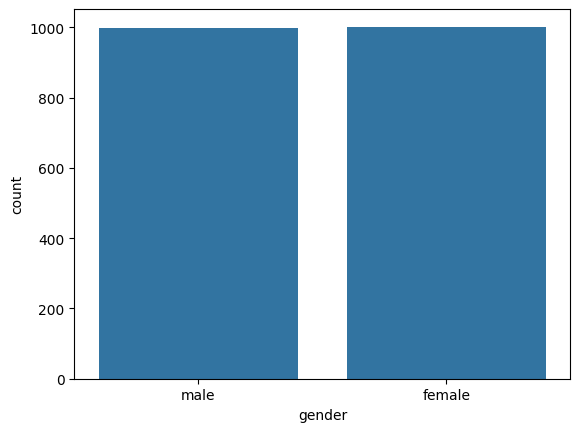

In [ ]:
sns.countplot(x='gender', data=df)

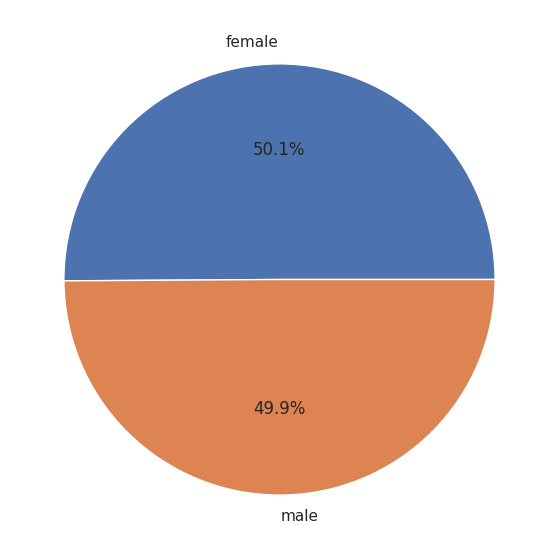

In [ ]:
plt.pie(df.gender.value_counts(),labels=df.gender.value_counts().index,autopct='%1.1f%%')
plt.show()

**Absence days**

In [ ]:
df.absence_days.value_counts()

absence_days
2     344
1     341
3     336
4     199
5     196
6     136
7     130
0     123
10     88
9      56
8      51
Name: count, dtype: int64

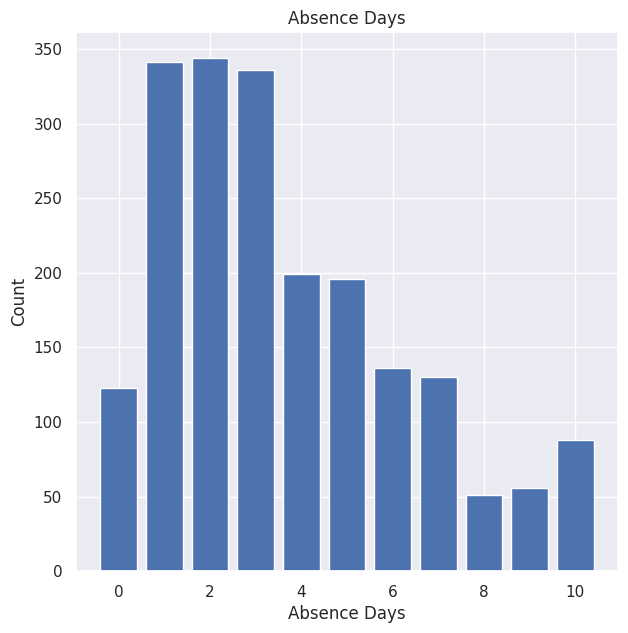

In [ ]:
x=df.absence_days.value_counts()
y=x.index
plt.bar(y,x)
plt.xlabel('Absence Days')
plt.ylabel('Count')
plt.title('Absence Days')
plt.show()

The dataset records the number of days of absence and their respective frequencies. Specifically, **344 students had 2 absence days**, **341 students had 1 absence day**, and **336 students had 3 absence days**.

**Part time job per student**

In [ ]:
df.part_time_job.value_counts()

part_time_job
False    1684
True      316
Name: count, dtype: int64

<Axes: xlabel='part_time_job'>

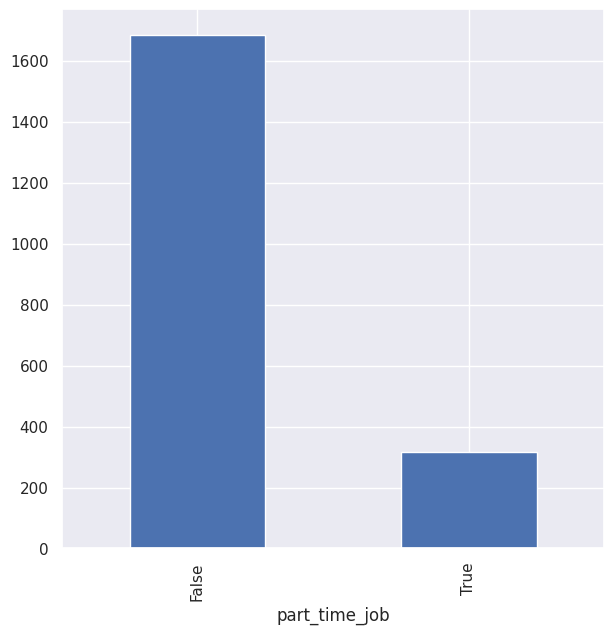

In [ ]:
df.part_time_job.value_counts().plot(kind='bar')

**extra curricular activities per student**

In [ ]:
df.extracurricular_activities.value_counts()

extracurricular_activities
False    1592
True      408
Name: count, dtype: int64

<Axes: xlabel='extracurricular_activities'>

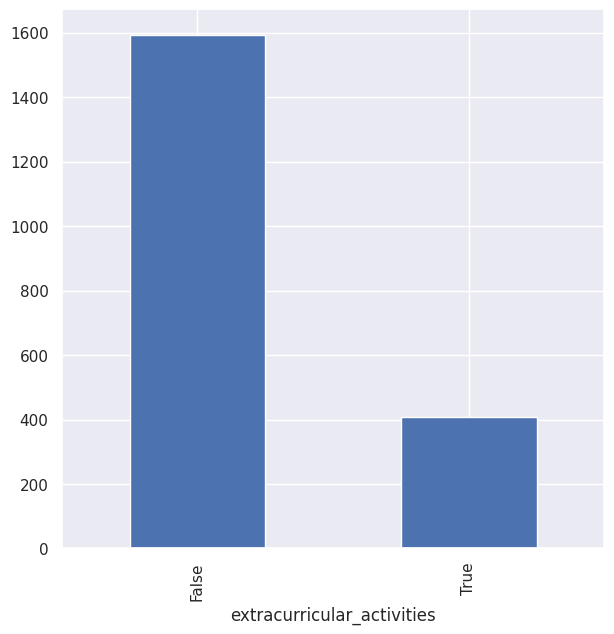

In [ ]:
df.extracurricular_activities.value_counts().plot(kind='bar')

**Weekly Study Hour per student based on dataset**

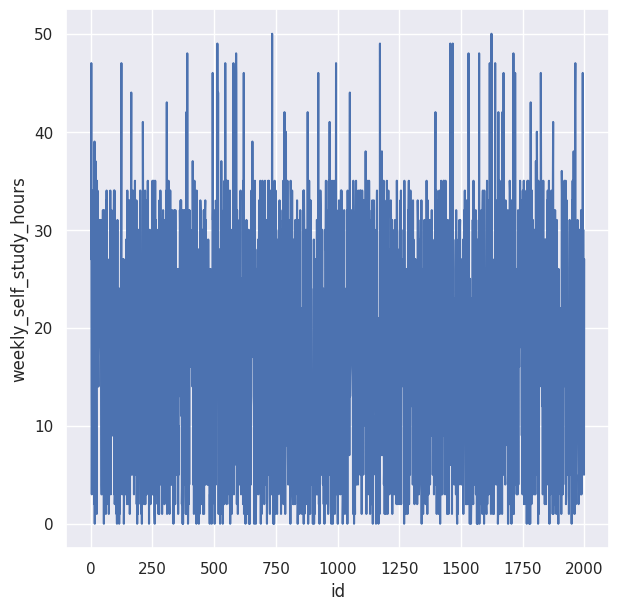

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.lineplot(x="id",y="weekly_self_study_hours",data=df)
plt.show()

**Career_aspiration based on dataset**

In [ ]:
df.career_aspiration.value_counts()

career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64

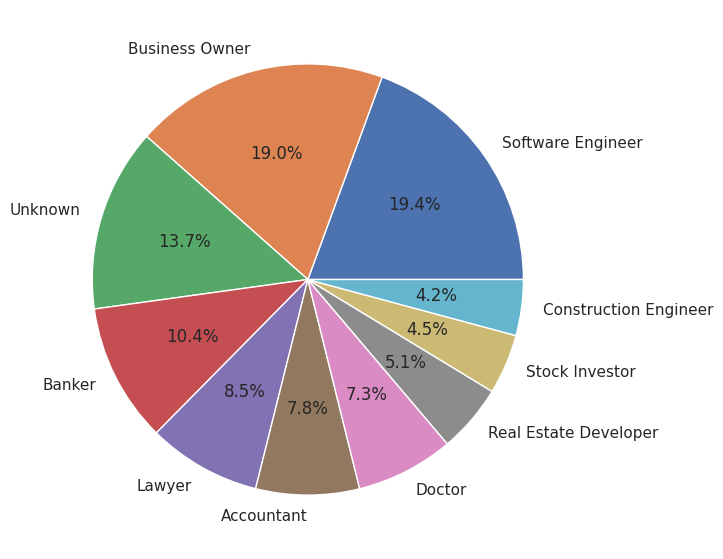

In [ ]:
plt.pie(df.career_aspiration.value_counts()[0:10],labels=df.career_aspiration.value_counts()[0:10].index,autopct='%1.1f%%')
plt.show()

**Top 10 scores All subject based on Dataset**

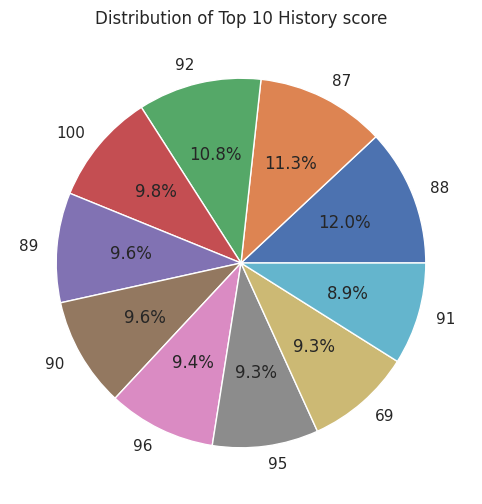

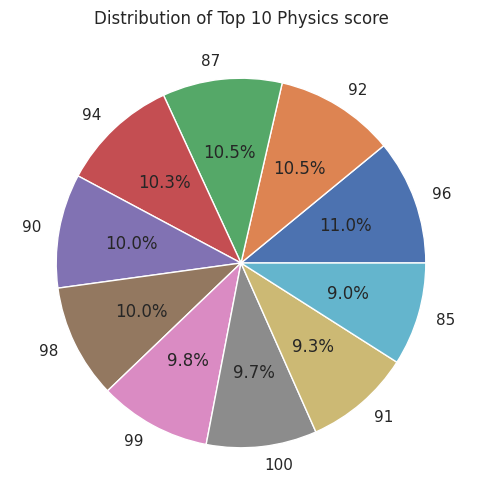

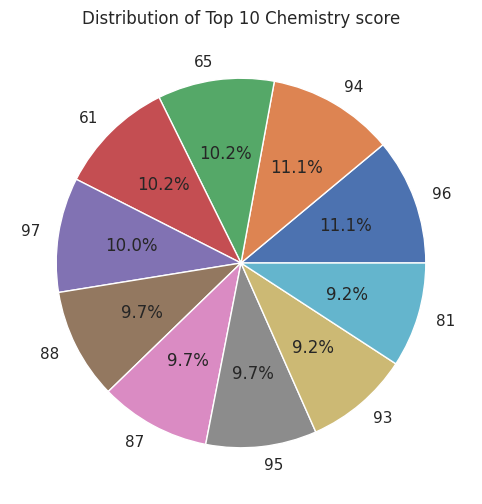

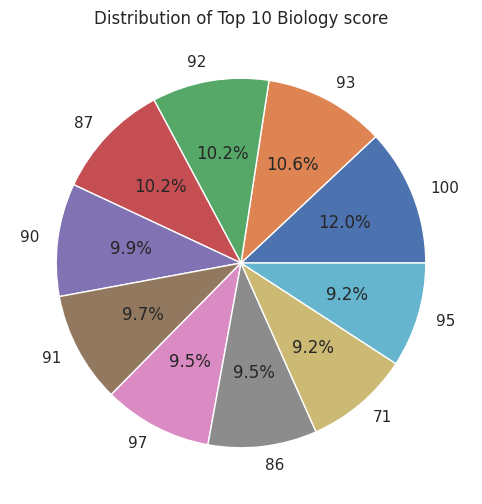

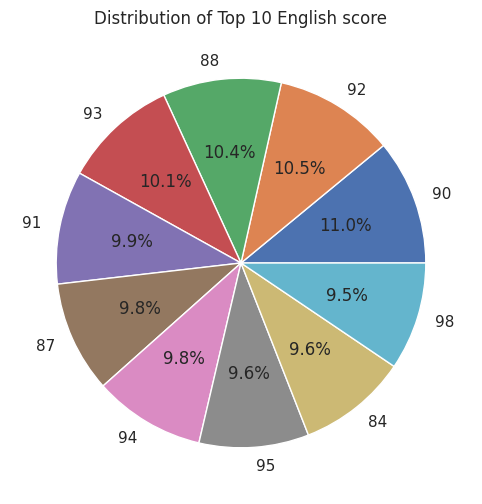

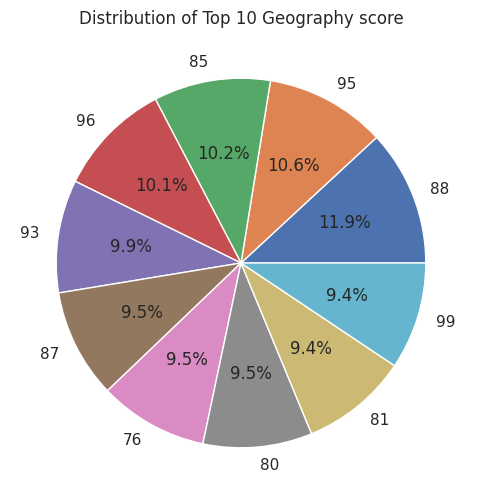

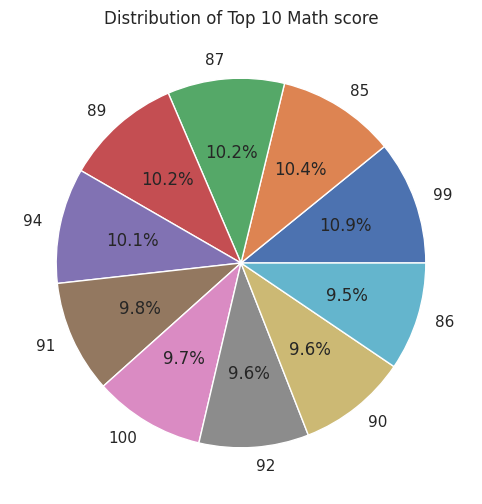

In [ ]:
import matplotlib.pyplot as plt

# List of score columns
score_columns = [
    'history_score',
    'physics_score',
    'chemistry_score',
    'biology_score',
    'english_score',
    'geography_score',
    'math_score'
]

# Create pie charts for the value counts of each score column
for score in score_columns:
    plt.figure(figsize=(8, 6))
    value_counts = df[score].value_counts()[0:10]
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of Top 10 {score.replace("_", " ").capitalize()}')
    plt.show()


#**Train test spilt and Model**

**LinearRegression**

In [6]:

from sklearn.linear_model import LinearRegression

X = df[['weekly_self_study_hours']]
y = df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


scores_prediction = lr.predict(X_test)


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, scores_prediction)
mse = mean_squared_error(y_test, scores_prediction)
rmse = mean_squared_error(y_test, scores_prediction, squared=False)  # RMSE requires squared=False
r2 = r2_score(y_test, scores_prediction)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 10.569560699952945
Mean Squared Error: 157.19963233954513
Root Mean Squared Error: 12.512058136621388
R-squared: 0.06989445362198836


**RandomForestRegressor**

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting scores
y_scores = rf_regressor.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_scores)
mse = mean_squared_error(y_test, y_scores)
rmse = mean_squared_error(y_test, y_scores, squared=False)  # RMSE requires squared=False
r2 = r2_score(y_test, y_scores)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 10.34196737422064
Mean Squared Error: 155.11826587743127
Root Mean Squared Error: 12.435208713834962
R-squared: 0.08104526947084921


#**Prediction**

**RandomForestRegressor mark Prediction**

In [10]:
weekly_self_study_hours = [[10]]
rf_regressor.predict(weekly_self_study_hours)
print("Predicted scores for Work self study hours =", weekly_self_study_hours[0][0])
for subject, score in zip(df.columns[10:], y_scores[0]):
    print(subject, ":", score)

Predicted scores for Work self study hours = 10
math_score : 87.41264001051664
history_score : 80.93569212679061
physics_score : 79.35630888950622
chemistry_score : 80.61503207427357
biology_score : 77.781020183483
english_score : 78.18062427408636
geography_score : 81.55442419800443


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**LinearRegression marks predicton**

In [11]:
weekly_self_study_hours = [[10]]
lr.predict(weekly_self_study_hours)
print("Predicted scores for weekly self study hours =", weekly_self_study_hours[0][0])
for subject, score in zip(df.columns[10:], scores_prediction[0]):
    print(subject, ":", score)

Predicted scores for weekly self study hours = 10
math_score : 83.85494696371136
history_score : 80.58655057528614
physics_score : 81.41765882971521
chemistry_score : 80.13914487523964
biology_score : 79.77163100368479
english_score : 81.46481764034921
geography_score : 80.9546061406571


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Compare between all test scores and predicted scores using RandomForest Regressor**

In [ ]:

predicted_scores = rf_regressor.predict(X_test)

# Print actual and predicted scores for comparison
for i in range(len(y_test)):
    print("Actual scores:", y_test.iloc[i].values)
    print("Predicted scores:", predicted_scores[i])
    print("="*30)


Actual scores: [97 95 91 97 96 90 67]
Predicted scores: [87.41264001 80.93569213 79.35630889 80.61503207 77.78102018 78.18062427
 81.5544242 ]
Actual scores: [85 64 90 94 68 97 61]
Predicted scores: [76.17679418 74.90844668 78.61892351 80.67157144 76.36985633 76.10721121
 78.86545541]
Actual scores: [80 62 66 88 75 98 68]
Predicted scores: [88.08498446 81.92643187 80.00760968 77.03576785 78.11693753 80.99789794
 77.82361672]
Actual scores: [57 74 98 93 63 70 67]
Predicted scores: [69.48331972 75.10080183 79.86909211 76.35427384 78.04777929 74.74592242
 79.1586393 ]
Actual scores: [86 93 91 64 69 71 64]
Predicted scores: [75.04123694 75.16394431 77.73719061 77.25624229 75.73648443 76.29759286
 80.92387377]
Actual scores: [99 72 90 83 90 99 97]
Predicted scores: [69.48331972 75.10080183 79.86909211 76.35427384 78.04777929 74.74592242
 79.1586393 ]
Actual scores: [ 98  72  87  74 100  84  85]
Predicted scores: [85.95073241 79.43833691 81.77696792 80.74510274 76.38215684 84.39928334
 81.34

# **Compare between all test scores and predicted scores using Linear Regressor**

In [ ]:
predicted_scores = lr.predict(X_test)

# Print actual and predicted scores for comparison
for i in range(len(y_test)):
    print("Actual scores:", y_test.iloc[i].values)
    print("Predicted scores:", predicted_scores[i])
    print("="*30)


Actual scores: [97 95 91 97 96 90 67]
Predicted scores: [83.85494696 80.58655058 81.41765883 80.13914488 79.771631   81.46481764
 80.95460614]
Actual scores: [85 64 90 94 68 97 61]
Predicted scores: [76.10302204 75.70259461 77.57365977 76.3412666  75.99392984 77.14732981
 78.73583848]
Actual scores: [80 62 66 88 75 98 68]
Predicted scores: [82.56295948 79.77255791 80.77699232 79.50616516 79.14201414 80.74523634
 80.58481153]
Actual scores: [57 74 98 93 63 70 67]
Predicted scores: [77.82567203 76.78791815 78.42788179 77.18523955 76.83341898 78.10677155
 79.22889796]
Actual scores: [86 93 91 64 69 71 64]
Predicted scores: [76.53368454 75.97392549 77.78721528 76.55225984 76.20380212 77.38719025
 78.85910335]
Actual scores: [99 72 90 83 90 99 97]
Predicted scores: [77.82567203 76.78791815 78.42788179 77.18523955 76.83341898 78.10677155
 79.22889796]
Actual scores: [ 98  72  87  74 100  84  85]
Predicted scores: [82.13229698 79.50122703 80.56343682 79.29517193 78.93214186 80.5053759
 80.461